In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cycler
import pandas as pd
from scipy.signal import find_peaks
from scipy.optimize import curve_fit

# Matplotlib style template
## For black, set #000000. For navy, set #002060
defaultcolor = '#002060'
plt.rcParams.update({'text.color': defaultcolor, 'axes.labelcolor': defaultcolor, 
                     'xtick.color': defaultcolor, 'ytick.color': defaultcolor,
                     'axes.prop_cycle': cycler(color=['b', 'r', 'limegreen', 'm']),
                     'font.family':'serif', 'font.serif': 'Times New Roman',
                     'font.size': 22, 'lines.linewidth': 3,
                     'figure.figsize': (9.6, 5.4), 'figure.dpi': 100})

## Exercise 1

In [15]:
data = pd.read_csv('ex1.txt')

In [16]:
data

,msglen,n2,n4,n8,n16
0,100000,9864.46,5688.47,3437.41,3373.49
1,200000,9719.92,6334.81,4067.20,3546.84
2,300000,9925.58,7149.62,4820.34,3806.93
3,400000,12053.26,8210.12,4828.32,3781.82
4,500000,12130.49,8458.53,5113.40,3693.56
5,600000,12239.18,8747.40,5101.23,3681.41
6,700000,12251.56,8683.44,5176.40,3664.41
7,800000,12268.55,8947.87,5241.47,3755.12
8,900000,12271.79,9088.25,5317.76,3955.73
9,1000000,12412.09,9155.64,5493.23,4106.39


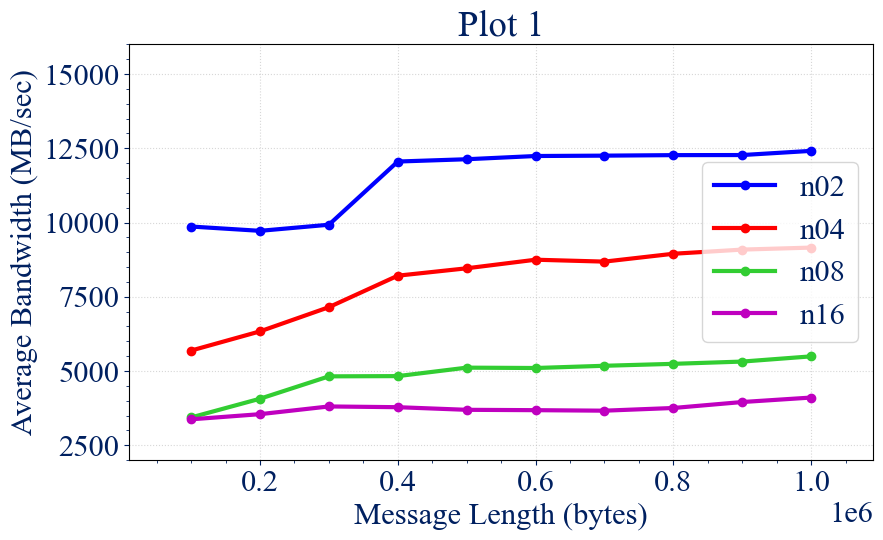

In [17]:
for i in range(1,5):
    plt.plot(data[f'msglen'], data[f'n{2**i}'], label=f'n{2**i:02d}', marker='o')

plt.title('Plot 1')
plt.xlabel('Message Length (bytes)')
plt.ylabel('Average Bandwidth (MB/sec)')
plt.ylim([2000,16000])
plt.margins(x=0.1)
plt.grid(alpha=0.5, ls='dotted')

plt.minorticks_on()
plt.legend(loc=7)
plt.show()

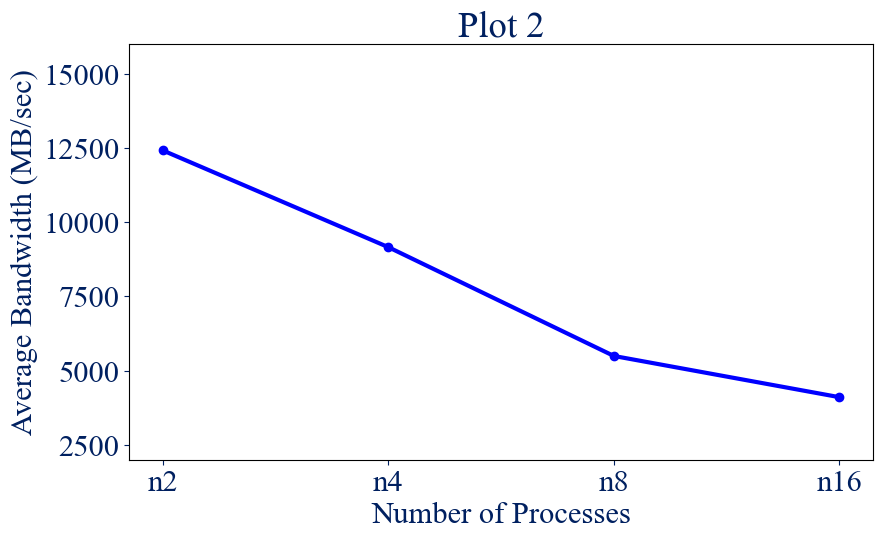

In [18]:
plt.plot(data.columns[1:], data.iloc[-1][1:], marker='o')

plt.title('Plot 2')
plt.xlabel('Number of Processes')
plt.ylabel('Average Bandwidth (MB/sec)')
plt.ylim([2000,16000])
plt.show()

## Exercise 2

In [19]:
data2 = pd.read_csv('ex2.txt')

In [20]:
data2

,msglen,n2,n4,n8,n16
0,100000,7455.12,9004.75,5784.27,6892.95
1,200000,12692.58,13089.45,6927.62,6389.10
2,300000,14387.46,14418.93,6880.93,5916.96
3,400000,14745.46,14726.10,6736.49,5761.98
4,500000,14883.92,14754.57,6807.71,5964.91
5,600000,14926.24,15052.04,6511.33,6106.76
6,700000,15037.42,15071.95,6626.84,6305.50
7,800000,15017.21,15163.66,6463.71,6421.50
8,900000,15110.56,15263.86,6482.25,6747.29
9,1000000,15167.83,15363.87,6676.35,6893.03


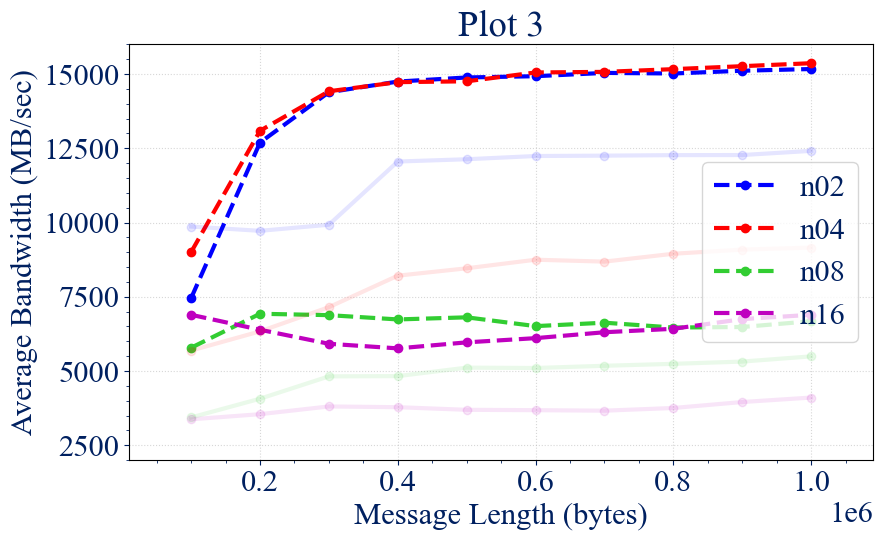

In [21]:
for i in range(1,5):
    plt.plot(data2[f'msglen'], data2[f'n{2**i}'], label=f'n{2**i:02d}', marker='o', ls='--')
for i in range(1,5):
    plt.plot(data[f'msglen'], data[f'n{2**i}'], alpha=0.1, marker='o')

plt.title('Plot 3')
plt.xlabel('Message Length (bytes)')
plt.ylabel('Average Bandwidth (MB/sec)')
plt.ylim([2000,16000])
plt.margins(x=0.1)
plt.grid(alpha=0.5, ls='dotted')

plt.minorticks_on()
plt.legend(loc=7)
plt.show()

In [23]:
data2 / data

,msglen,n2,n4,n8,n16
0,1.0,0.755756,1.582983,1.682741,2.043270
1,1.0,1.305832,2.066273,1.703290,1.801350
2,1.0,1.449533,2.016741,1.427478,1.554260
3,1.0,1.223359,1.793652,1.395204,1.523600
4,1.0,1.226984,1.744342,1.331347,1.614949
5,1.0,1.219546,1.720744,1.276424,1.658810
6,1.0,1.227388,1.735712,1.280202,1.720741
7,1.0,1.224041,1.694667,1.233186,1.710065
8,1.0,1.231325,1.679516,1.218981,1.705700
9,1.0,1.222021,1.678077,1.215378,1.678611


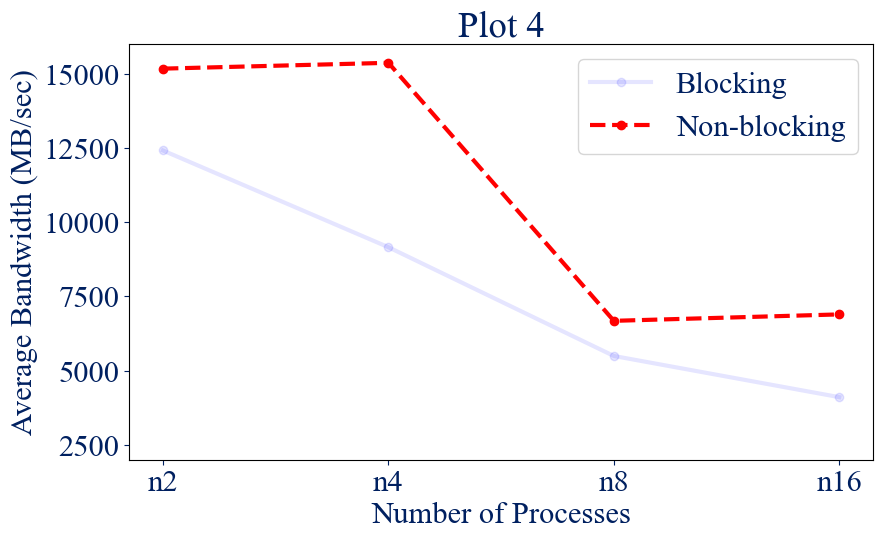

In [22]:
plt.plot(data.columns[1:], data.iloc[-1][1:], marker='o', alpha=0.1, label='Blocking')
plt.plot(data2.columns[1:], data2.iloc[-1][1:], marker='o', label='Non-blocking', ls='--')

plt.title('Plot 4')
plt.xlabel('Number of Processes')
plt.ylabel('Average Bandwidth (MB/sec)')
plt.ylim([2000,16000])
plt.legend()
plt.show()

## Exercise 3

In [2]:
plt.rcParams.update({
                    'lines.linewidth': 2, 
                    'axes.prop_cycle': cycler(color=['orange','b', 'r', 'limegreen', 'm', 'c', 'k'])
                    })
data = pd.read_csv('ex3-1x.txt', dtype=float)

In [3]:
data

,n,inittime,comptime,redT,maxT,minT,avgT
0,1.0,0.000027,0.000022,-1.000000,-1.000000,-1.000000,-1.000000
1,2.0,0.000144,0.000136,0.000022,0.000026,0.000020,0.000021
2,4.0,0.000148,0.000138,0.000007,0.000010,0.000007,0.000007
3,6.0,0.000796,0.000785,0.000004,0.000008,0.000004,0.000004
4,8.0,0.000269,0.000262,0.000003,0.000008,0.000003,0.000003
5,12.0,0.000345,0.000337,0.000002,0.000008,0.000002,0.000002
6,16.0,0.000955,0.000950,0.000001,0.000004,0.000001,0.000001


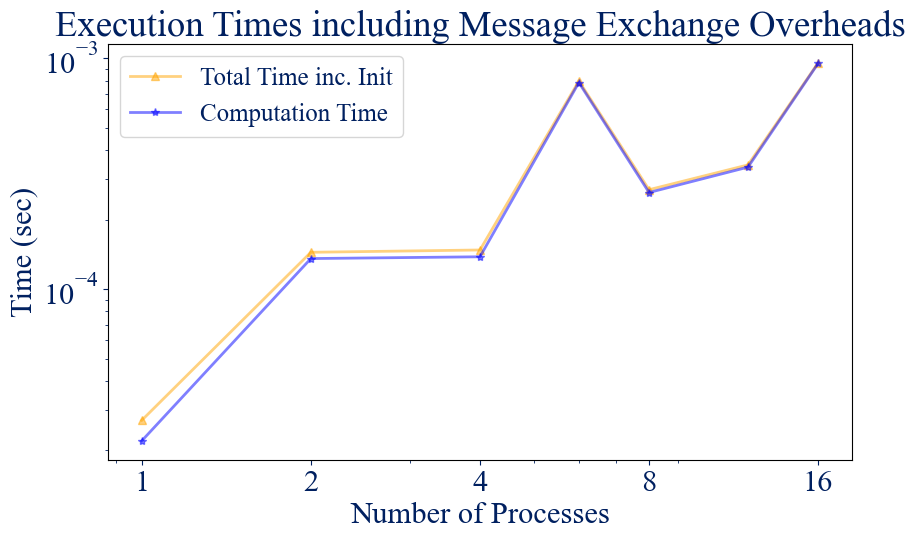

In [4]:
xdata = data['n']

plt.plot(xdata, data['inittime'], label='Total Time inc. Init', marker='^', alpha=0.5)
plt.plot(xdata, data['comptime'], label='Computation Time', marker='*', alpha=0.5)

plt.title('Execution Times including Message Exchange Overheads')
plt.xlabel('Number of Processes')
plt.ylabel('Time (sec)')
plt.xscale('log')
plt.xticks([1,2,4,8,16])
plt.gca().set_xticklabels([1,2,4,8,16])
# plt.ylim([1e-6,5e-5])
plt.yscale('log')
plt.minorticks_on()
plt.legend(fontsize=18)
plt.show()

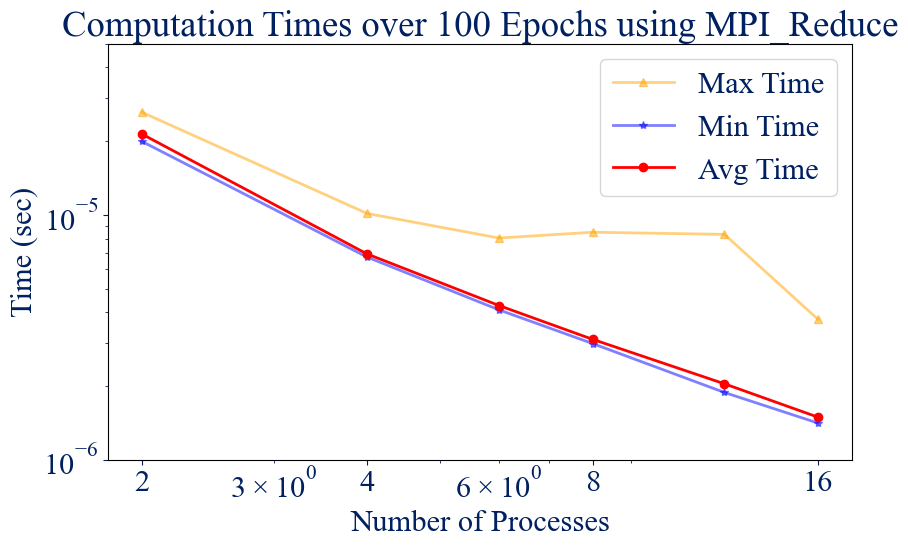

In [5]:
xdata = data['n'][1:]

plt.plot(xdata, data['maxT'][1:], label='Max Time', marker='^', alpha=0.5)
plt.plot(xdata, data['minT'][1:], label='Min Time', marker='*', alpha=0.5)
plt.plot(xdata, data['avgT'][1:], label='Avg Time', marker='o')

plt.title('Computation Times over 100 Epochs using MPI_Reduce')
plt.xlabel('Number of Processes')
plt.ylabel('Time (sec)')
plt.xscale('log')
plt.xticks([2,4,8,16])
plt.gca().set_xticklabels([2,4,8,16])
plt.ylim([1e-6,5e-5])
plt.yscale('log')
plt.minorticks_on()
plt.legend()
plt.show()

In [6]:
data2 = pd.read_csv('ex3-3x.txt', dtype=float)

In [7]:
data2

,n,inittime,comptime,redT,maxT,minT,avgT
0,1.0,0.000634,0.000592,-1.000000,-1.000000,-1.000000,-1.000000
1,2.0,0.000979,0.000928,0.000601,0.000681,0.000595,0.000603
2,4.0,0.000714,0.000662,0.000199,0.000239,0.000198,0.000201
3,6.0,0.000889,0.000841,0.000119,0.000145,0.000119,0.000120
4,8.0,0.000944,0.000899,0.000085,0.000117,0.000085,0.000086
5,12.0,0.000926,0.000882,0.000054,0.000085,0.000054,0.000055
6,16.0,0.001095,0.001054,0.000040,0.000066,0.000040,0.000041


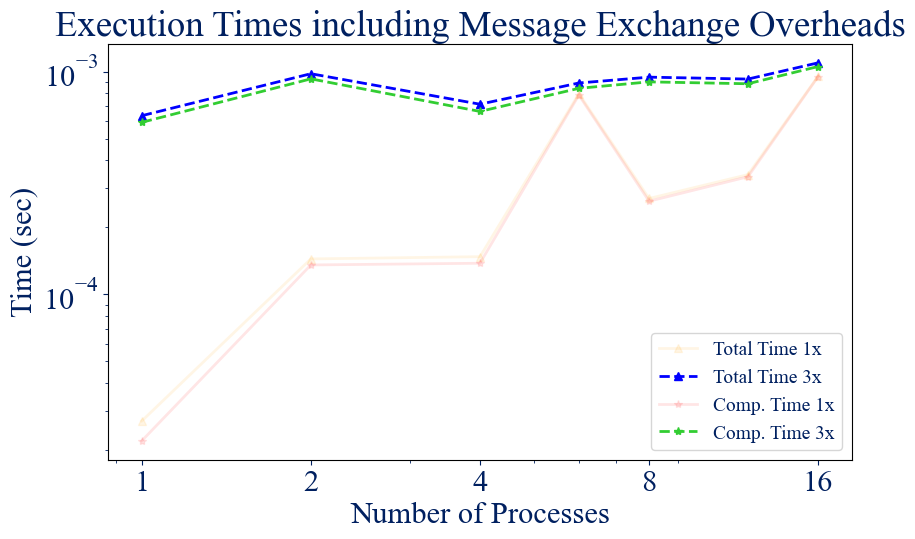

In [8]:
xdata = data['n']

plt.plot(xdata, data['inittime'], label='Total Time 1x', marker='^', alpha=0.1)
plt.plot(xdata, data2['inittime'], label='Total Time 3x', marker='^', alpha=1, ls='--')
plt.plot(xdata, data['comptime'], label='Comp. Time 1x', marker='*', alpha=0.1)
plt.plot(xdata, data2['comptime'], label='Comp. Time 3x', marker='*', alpha=1, ls='--')

plt.title('Execution Times including Message Exchange Overheads')
plt.xlabel('Number of Processes')
plt.ylabel('Time (sec)')
plt.xscale('log')
plt.xticks([1,2,4,8,16])
plt.gca().set_xticklabels([1,2,4,8,16])
# plt.ylim([1e-6,5e-5])
plt.yscale('log')
plt.minorticks_on()
plt.legend(fontsize=14)
plt.show()

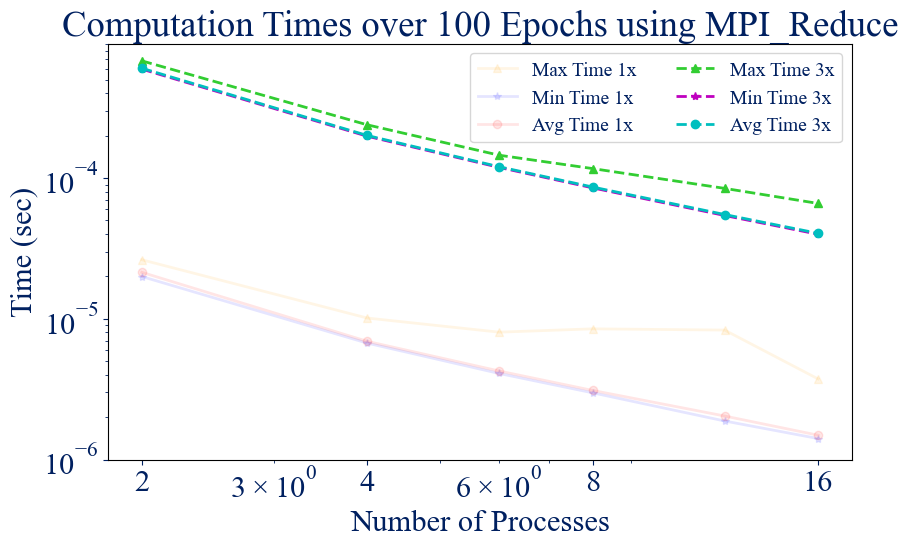

In [9]:
xdata = data['n'][1:]

plt.plot(xdata, data['maxT'][1:], label='Max Time 1x', marker='^', alpha=0.1)
plt.plot(xdata, data['minT'][1:], label='Min Time 1x', marker='*', alpha=0.1)
plt.plot(xdata, data['avgT'][1:], label='Avg Time 1x', marker='o', alpha=0.1)
plt.plot(xdata, data2['maxT'][1:], label='Max Time 3x', marker='^', alpha=1, ls='--')
plt.plot(xdata, data2['minT'][1:], label='Min Time 3x', marker='*', alpha=1, ls='--')
plt.plot(xdata, data2['avgT'][1:], label='Avg Time 3x', marker='o', ls='--')

plt.title('Computation Times over 100 Epochs using MPI_Reduce')
plt.xlabel('Number of Processes')
plt.ylabel('Time (sec)')
plt.xscale('log')
plt.minorticks_on()
plt.xticks([2,4,8,16])
plt.gca().set_xticklabels([2,4,8,16])
plt.ylim([1e-6,9e-4])
plt.yscale('log')
plt.legend(ncol=2, fontsize=14)
plt.show()